# Data Science Homework2
## 2018-15185 김나경

Used csv reader for problem 1-(a),(b),(c),(d) and pandas for numpy to compare using-numpy method and not-using-numpy method.

In [1]:
import numpy as np
import csv

birth_data = open("births.csv")
csv_reader = csv.DictReader(birth_data)
line_count = 0

for row in csv_reader:
    if line_count == 0: 
        line_count += 1
    elif line_count == 1:
        birth_arr = np.array(row)
        line_count +=1
    else:
        birth_arr = np.append(birth_arr, row)
        line_count += 1
        
print(birth_arr) #show the birth_arr

[{'year': '1969', 'month': '1', 'day': '1', 'gender': 'M', 'births': '4440'}
 {'year': '1969', 'month': '1', 'day': '2', 'gender': 'F', 'births': '4454'}
 {'year': '1969', 'month': '1', 'day': '2', 'gender': 'M', 'births': '4548'}
 ...
 {'year': '2008', 'month': '11', 'day': 'null', 'gender': 'M', 'births': '165468'}
 {'year': '2008', 'month': '12', 'day': 'null', 'gender': 'F', 'births': '173215'}
 {'year': '2008', 'month': '12', 'day': 'null', 'gender': 'M', 'births': '181235'}]


### Problem 1
### (sorting) Sort the births data in an ascending order using the following methods and record the running time using %timeit.
#### (a) Selection Sorting 
selection_sort function looks for the minimum value and when found, save it.

In [2]:
def selection_sort(arr):
    for i in range(len(arr) - 1):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j]["births"] < arr[min_idx]["births"]: #when new minimal value is found
                min_idx = j #change the index for the minimum
        arr[i], arr[min_idx] = arr[min_idx], arr[i] #swap the values
        
#measure time when operated with the given array
%timeit selection_sort(birth_arr)

32.9 s ± 3.02 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### (b) insertion sorting
insertion_sort starts with second value(index 1) becuase this function compares the former values and next value.

In [3]:
def insertion_sort(arr):
    for end in range(1, len(arr)): #starts with second value
        for i in range(end, 0, -1): #i starts from the end, in reverse
            if arr[i - 1]["births"] > arr[i]["births"]: #when new maximal value is found
                arr[i - 1], arr[i] = arr[i], arr[i - 1] #swap the values
                
#measure time when operated with the given array        
%timeit insertion_sort(birth_arr)

41.3 s ± 7.88 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### (c) merge sorting
Merge sorting consists of dividing, conquering and combining. After dividing one array into two, the function compares every element of one array with the other and move it into a new list as a result of comparing.

In [4]:
#separated merge and merge_sort for better efficiency
#merge only compares given left and right lists or arrays with given comparing condition and merges it
def merge(left, right, compare):
    result = [] #an empty list for the output
    i, j = 0, 0 #i is an index for left array and j is for right array
    while i < len(left) and j < len(right):
        if compare(left[i]["births"], right[j]["births"]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    while i < len(left):
        result.append(left[i])
        i += 1
    while j < len(right):
        result.append(right[j])
        j += 1
    return result

#merge_sort applies merge function for a whole array by dividing the given array by half
def merge_sort(arr, compare = lambda x, y: x < y): 
    if len(arr) < 2:
        return arr
    else:
        mid = len(arr) // 2 #divide an array into two
        left_arr = merge_sort(arr[:mid], compare) #recursion
        right_arr = merge_sort(arr[mid:], compare) #recursion
    return merge(left_arr, right_arr, compare) #call merge function

#measure time when operated with the given array   
%timeit merge_sort(birth_arr)

80.5 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### (d) bubble sorting
Bubble sorting compares two adjacent elements and it's basically similar to selection sorting.

In [5]:
def bubble_sort(arr):
    for i in range(len(arr) - 1, 0, -1):
        for j in range(i):
            if arr[j]["births"] > arr[j + 1]["births"]: #when jth element is larger than j+1th value
                arr[j], arr[j + 1] = arr[j + 1], arr[j] #swap
                
#measure time when operated with the given array
%timeit bubble_sort(birth_arr)

53.8 s ± 1.23 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### using np.argsort
Made a new dataset with pandas and numpy.array. Then, using numpy.argsort, I sorted the given dataset by indices.

In [6]:
import pandas as pd
birth_data = pd.read_csv("births.csv")
births = np.array(birth_data['births'])
sort_indices = np.argsort(births) #argsort returns indices of sorted list
%timeit np.array(birth_data)[sort_indices]

2.8 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


These are the results that came out on 27th, September on MacOs.
selection sorting: 35.3 s ± 2.63 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
insertion sorting: 37.4 s ± 1.82 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
merge sorting: 78.6 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
bubble_sorting: 54.5 s ± 497 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
numpy: 2.74 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Measure time can be changed depending on various conditions. However, among first four sorting methods, merge sorting was the most efficient way of sorting when dealing with large data. It's not only because of the running time but also because of the algorithm complexity.

First, the average algorithm complexity is n^2, n^2, n*logn, n^2 each. Merge sorting is faster than others.
Second, selection sorting is unstable while others are stable. When saying stability, I looked at if the relative place of node with key is changed before and after running the program. In selectino sorting, the elements are really swapped, making the algorithm unstable while other sorting methods didn't show any changes.

As a result, merge sorting is the most efficient sorting method among first four methods.

However, using numpy was much faster than merge sorting.


### Problem 2
#### (a) Calculate the number of entries with births between 7000-10000 and find the indices of minimum, maximum values of this range.

In [14]:
#the number of entries between two values 
in_range_indices = np.where((births>=5000) & (births<=10000))[0] #used np.where command to find indices
#because np.where command returned a list of indices and that list was inside an array,
#by using [0], in_range_indices only have a list of indices

print("the number of entries with births between 7000-10000: ", len(in_range_indices))

the number of entries with births between 7000-10000:  5817


In [15]:
#minimum values of the given range
np.min(np.array(births[in_range_indices])) #array of births with in_range_indices

5000

In [16]:
#maximum values of the given range
np.max(np.array(births[in_range_indices])) #array of births with in_range_indices

6527

#### (b) Select the data for May 20th of each year and create an array containing only those values.

In [10]:
#birth_df is a data set with the data for May 20th births
birth_df = pd.DataFrame(birth_data[(birth_data.month == 5) & (birth_data.day == 20)])
sorted_df = birth_df.sort_values('births') #align entries in ascending order
print(sorted_df) #show the data set

       year  month   day gender  births
3354   1973      5  20.0      F    3548
3355   1973      5  20.0      M    3617
7167   1978      5  20.0      F    3881
2592   1972      5  20.0      F    3966
7922   1979      5  20.0      F    3981
11661  1984      5  20.0      F    4024
2593   1972      5  20.0      M    4066
5646   1976      5  20.0      F    4081
7923   1979      5  20.0      M    4100
4119   1974      5  20.0      F    4183
7168   1978      5  20.0      M    4197
11662  1984      5  20.0      M    4258
5647   1976      5  20.0      M    4333
4120   1974      5  20.0      M    4610
4884   1975      5  20.0      F    4655
1827   1971      5  20.0      F    4658
6404   1977      5  20.0      F    4717
6405   1977      5  20.0      M    4737
4885   1975      5  20.0      M    4899
1828   1971      5  20.0      M    4910
1062   1970      5  20.0      F    4950
10163  1982      5  20.0      F    5024
9415   1981      5  20.0      F    5029
294    1969      5  20.0      F    5034


In [11]:
#minimum value of 5/20 births
np.min(sorted_df)

year      1969
month        5
day         20
gender       F
births    3548
dtype: object

In [12]:
#maximum value of 5/20 births
np.max(sorted_df)

year      1988
month        5
day         20
gender       M
births    5893
dtype: object

### Problem 3
#### Draw a histogram of births.

Text(0, 0.5, 'number')

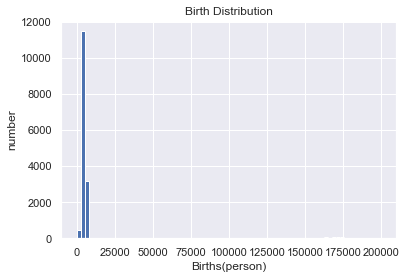

In [13]:
#to draw histograms
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.hist(births, bins = 75) #set bins as 75 for better visualization
plt.title('Birth Distribution')
plt.xlabel('Births(person)')
plt.ylabel('number')

Drawing with the Numy Routines and matplotlib is easier and more efficient compared to drawing it by hand. But for better visualization, it's important to realize features of data in order to decide proper density, bins, colors of histogram. (or other visualization method)